In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


In [2]:
data = pd.read_csv(r"C:\Users\97798\Desktop\archive\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [102]:
X = data.drop(['Attrition'], axis =1)

In [103]:
y = data.Attrition

In [104]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [105]:
y.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [107]:

ros = RandomOverSampler(random_state=42)
X_, y = ros.fit_resample(X,y)
X = pd.DataFrame(X_,columns=X.columns)
     

In [110]:

y.value_counts()

Attrition
Yes    1233
No     1233
Name: count, dtype: int64

In [111]:
num_features = X.select_dtypes(exclude="object")

In [112]:
cat_features = X.select_dtypes(include = "object")

In [113]:
num_features

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,40,1479,24,3,1,986,2,100,4,4,...,4,80,0,22,2,2,1,0,0,0
2462,53,1168,24,4,1,1968,1,66,3,3,...,2,80,0,15,2,2,2,2,2,2
2463,29,121,27,3,1,283,2,35,3,3,...,4,80,3,10,3,2,10,4,1,9
2464,30,1005,3,3,1,297,4,88,3,1,...,3,80,0,8,5,3,5,2,0,4


In [114]:
cat_features

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
2461,Non-Travel,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
2462,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Y,Yes
2463,Travel_Rarely,Sales,Marketing,Female,Sales Executive,Married,Y,No
2464,Travel_Rarely,Research & Development,Technical Degree,Female,Research Scientist,Single,Y,Yes


In [115]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(num_features)

VarianceThreshold(threshold=0)

In [116]:
var_thres.get_support()


array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True])

In [117]:
num_features.columns[var_thres.get_support()]


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [118]:
constant_columns = [column for column in num_features.columns
                    if column not in num_features.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [119]:
for feature in constant_columns:
     print(feature)

EmployeeCount
StandardHours


In [122]:
X_test.drop(constant_columns,axis=1)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1280,37,Travel_Rarely,1239,Human Resources,8,2,Other,1794,3,Male,...,3,3,0,19,4,2,10,0,4,7
319,32,Travel_Rarely,588,Sales,8,2,Technical Degree,436,3,Female,...,3,4,0,13,2,3,13,12,11,9
1429,39,Travel_Rarely,116,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,1,0,18,2,3,7,7,1,7
66,36,Travel_Frequently,1195,Research & Development,11,3,Life Sciences,85,2,Male,...,3,3,0,6,3,3,6,5,0,3
158,40,Travel_Rarely,630,Sales,4,4,Marketing,215,3,Male,...,3,1,1,15,2,2,12,11,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,47,Travel_Rarely,983,Research & Development,2,2,Medical,574,1,Female,...,3,3,3,20,2,3,5,0,0,4
799,42,Travel_Rarely,469,Research & Development,2,2,Medical,1109,4,Male,...,3,4,1,23,3,3,22,6,13,7
323,28,Travel_Rarely,1157,Research & Development,2,4,Medical,440,1,Male,...,3,4,0,5,4,2,3,2,2,2
997,27,Travel_Rarely,135,Research & Development,17,4,Life Sciences,1405,4,Female,...,3,4,0,8,2,3,8,2,7,7


In [123]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2)

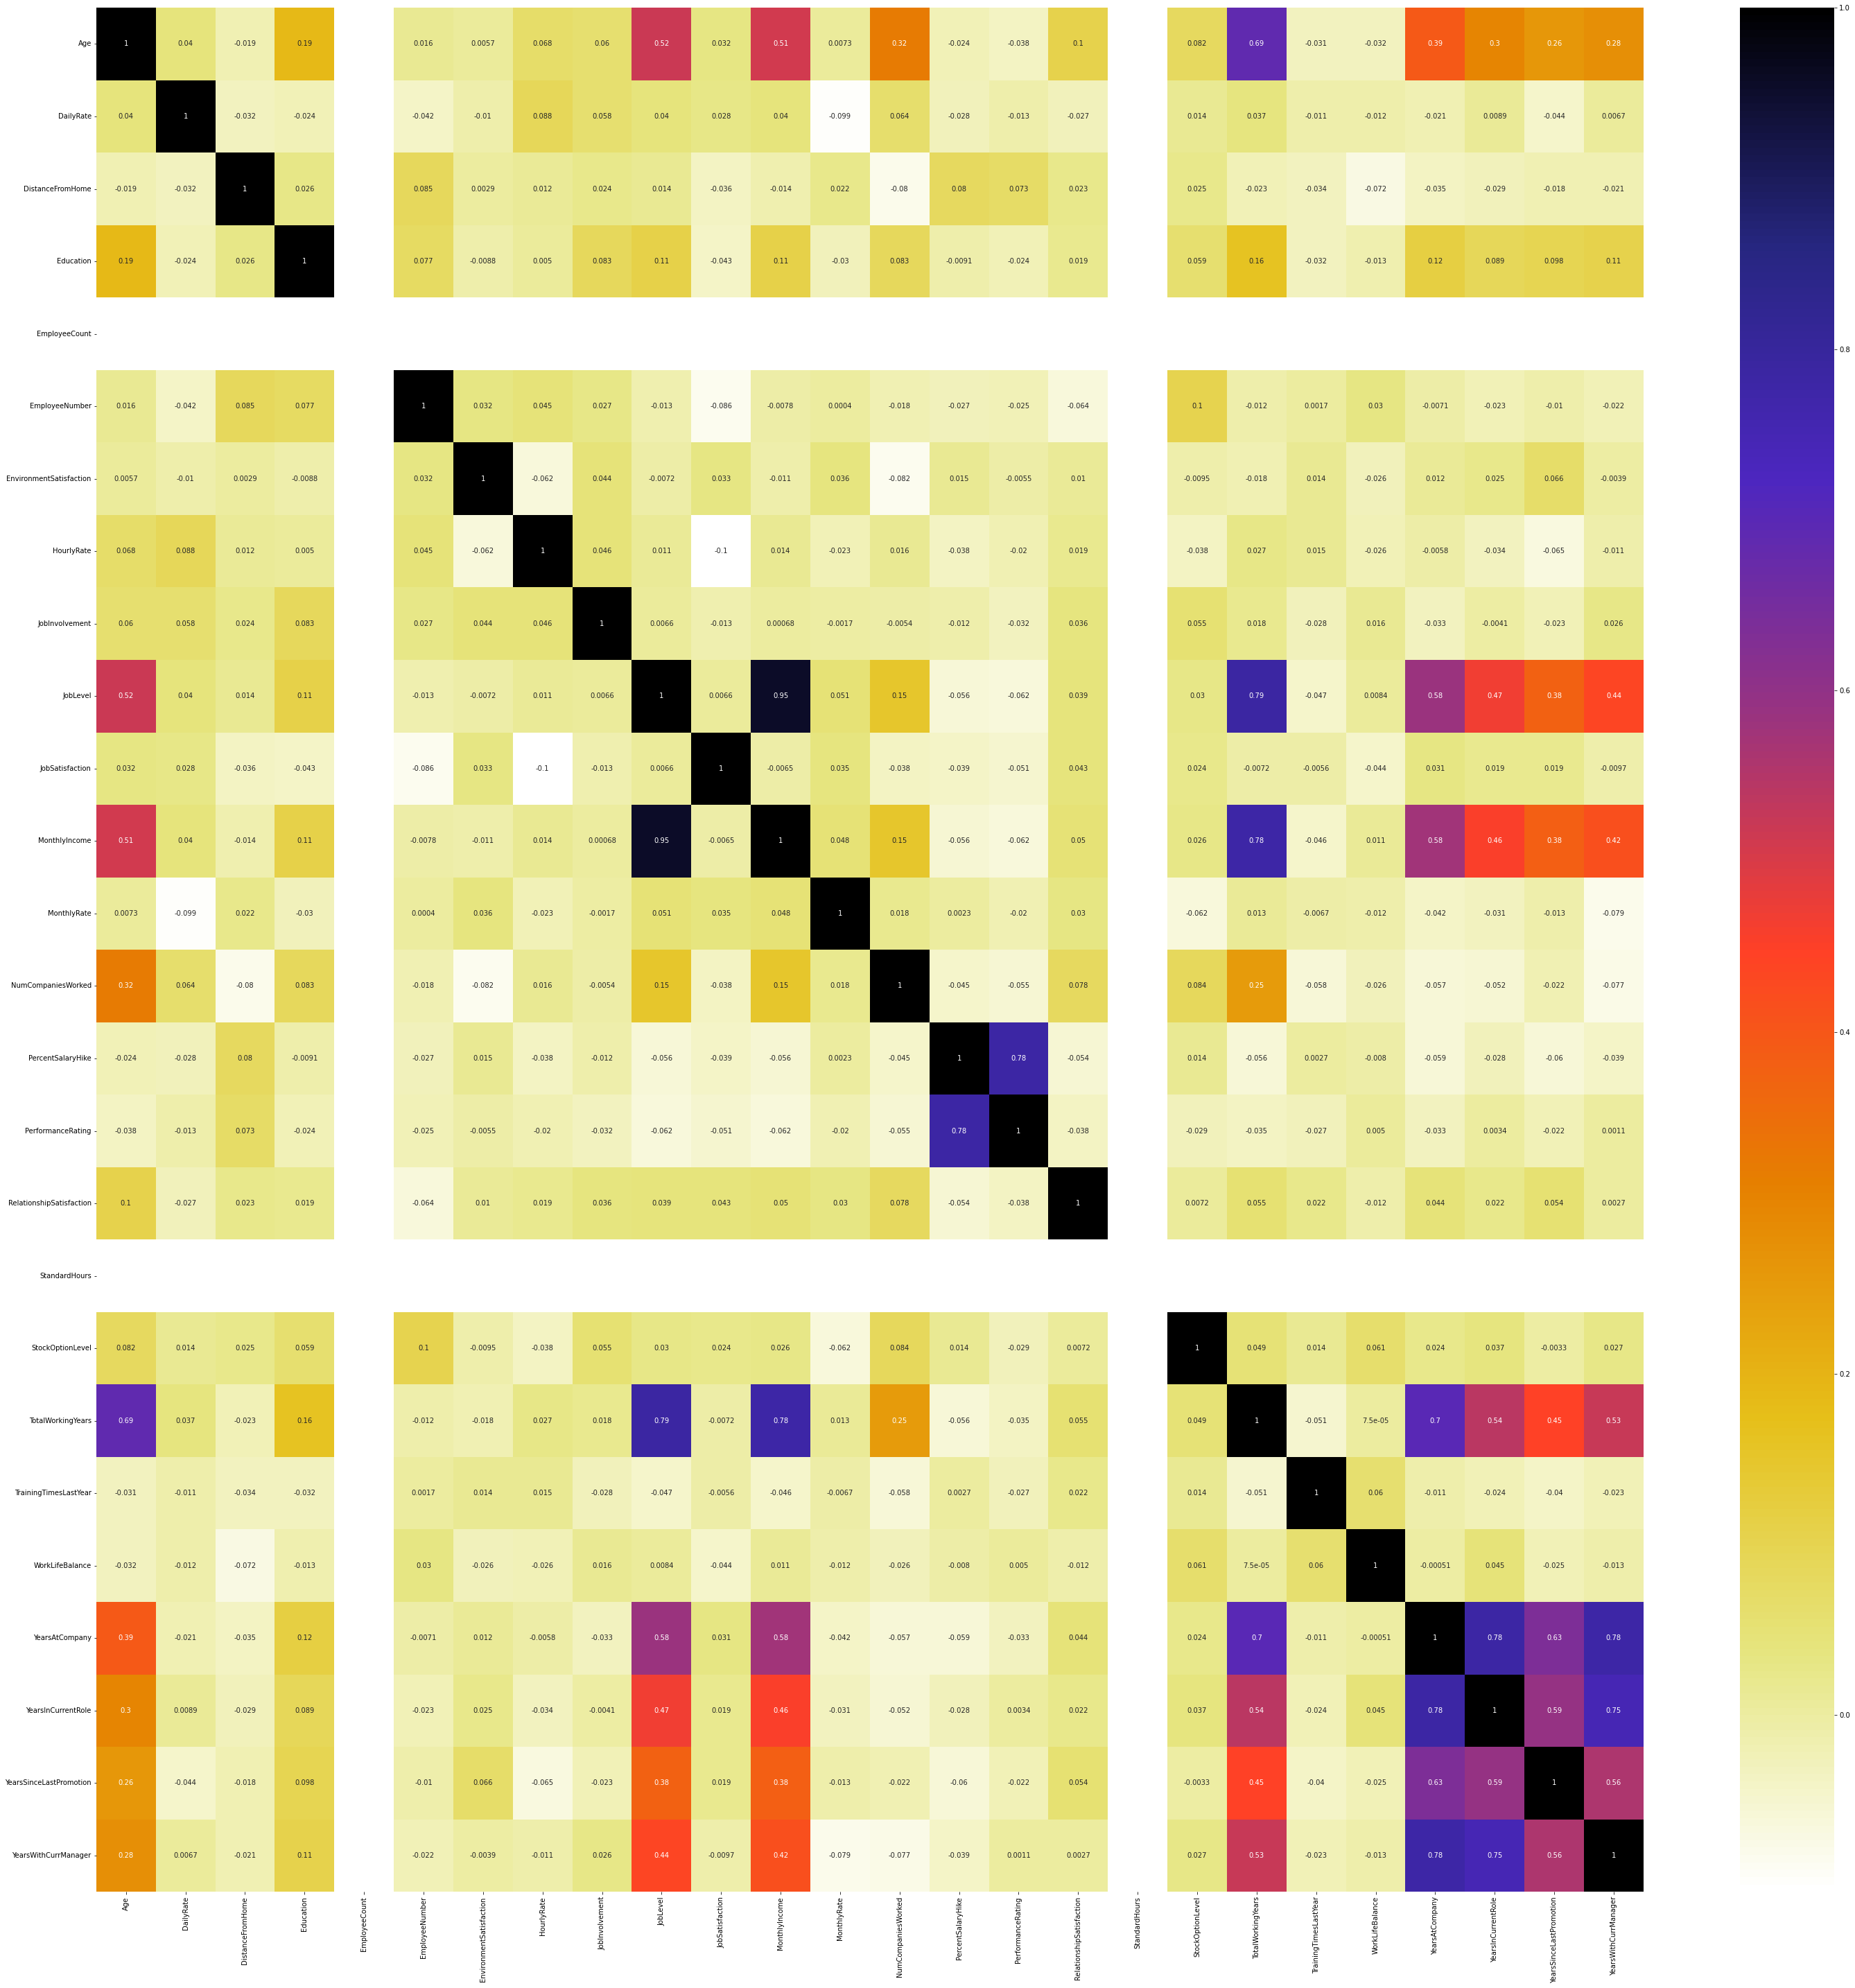

In [124]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(50,50))
cor = num_features.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [125]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [126]:
corr_features = correlation(num_features, 0.8)
len(set(corr_features))

1

In [127]:
corr_features


{'MonthlyIncome'}

In [130]:
X_test.drop(corr_features,axis=1)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2230,51,Travel_Frequently,1150,Research & Development,8,4,Life Sciences,1,179,1,...,4,80,0,18,2,3,4,2,0,3
1263,42,Travel_Rarely,855,Research & Development,12,3,Medical,1,1768,2,...,2,80,3,7,6,2,5,3,0,4
898,43,Travel_Rarely,920,Research & Development,3,3,Life Sciences,1,1255,3,...,2,80,1,25,2,3,8,7,0,7
557,35,Non-Travel,1225,Research & Development,2,4,Life Sciences,1,771,4,...,1,80,1,16,2,4,1,0,0,0
2288,52,Travel_Rarely,1030,Sales,5,3,Life Sciences,1,1319,2,...,3,80,0,10,2,2,8,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,29,Travel_Rarely,906,Research & Development,10,3,Life Sciences,1,994,4,...,3,80,0,3,5,3,0,0,0,0
116,34,Travel_Rarely,1354,Research & Development,5,3,Medical,1,153,3,...,4,80,0,14,6,3,11,10,5,8
853,19,Travel_Rarely,645,Research & Development,9,2,Life Sciences,1,1193,3,...,3,80,0,1,4,3,1,1,0,0
309,31,Travel_Rarely,691,Research & Development,5,4,Technical Degree,1,423,3,...,3,80,1,6,4,3,5,2,0,3


In [131]:
num_features

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,40,1479,24,3,1,986,2,100,4,4,...,4,80,0,22,2,2,1,0,0,0
2462,53,1168,24,4,1,1968,1,66,3,3,...,2,80,0,15,2,2,2,2,2,2
2463,29,121,27,3,1,283,2,35,3,3,...,4,80,3,10,3,2,10,4,1,9
2464,30,1005,3,3,1,297,4,88,3,1,...,3,80,0,8,5,3,5,2,0,4


In [132]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
293,26,Travel_Rarely,950,Sales,4,4,Marketing,1,401,4,...,2,80,0,8,0,3,8,7,7,4
931,30,Non-Travel,879,Research & Development,9,2,Medical,1,1298,3,...,3,80,0,10,3,3,8,4,1,7
2246,22,Travel_Rarely,391,Research & Development,7,1,Life Sciences,1,1878,4,...,1,80,0,1,2,3,1,0,0,0
1969,30,Travel_Frequently,464,Research & Development,4,3,Technical Degree,1,514,3,...,3,80,0,3,4,3,1,0,0,0
874,30,Travel_Rarely,853,Research & Development,7,4,Life Sciences,1,1224,3,...,1,80,3,10,4,2,10,7,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,29,Travel_Rarely,341,Sales,1,3,Medical,1,896,2,...,3,80,3,5,3,3,3,2,0,2
1265,33,Non-Travel,775,Research & Development,4,3,Technical Degree,1,1771,4,...,4,80,2,11,2,2,9,8,1,7
806,52,Travel_Rarely,994,Research & Development,7,4,Life Sciences,1,1118,2,...,4,80,0,18,4,3,8,6,4,0
1003,25,Travel_Rarely,949,Research & Development,1,3,Technical Degree,1,1415,1,...,2,80,1,7,2,2,3,2,0,2


In [133]:
X_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2230,51,Travel_Frequently,1150,Research & Development,8,4,Life Sciences,1,179,1,...,4,80,0,18,2,3,4,2,0,3
1263,42,Travel_Rarely,855,Research & Development,12,3,Medical,1,1768,2,...,2,80,3,7,6,2,5,3,0,4
898,43,Travel_Rarely,920,Research & Development,3,3,Life Sciences,1,1255,3,...,2,80,1,25,2,3,8,7,0,7
557,35,Non-Travel,1225,Research & Development,2,4,Life Sciences,1,771,4,...,1,80,1,16,2,4,1,0,0,0
2288,52,Travel_Rarely,1030,Sales,5,3,Life Sciences,1,1319,2,...,3,80,0,10,2,2,8,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,29,Travel_Rarely,906,Research & Development,10,3,Life Sciences,1,994,4,...,3,80,0,3,5,3,0,0,0,0
116,34,Travel_Rarely,1354,Research & Development,5,3,Medical,1,153,3,...,4,80,0,14,6,3,11,10,5,8
853,19,Travel_Rarely,645,Research & Development,9,2,Life Sciences,1,1193,3,...,3,80,0,1,4,3,1,1,0,0
309,31,Travel_Rarely,691,Research & Development,5,4,Technical Degree,1,423,3,...,3,80,1,6,4,3,5,2,0,3


In [134]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', MinMaxScaler(feature_range=(0,1
                                               )), num_features.columns)
    ],
    remainder='passthrough'
)

In [135]:
from tabulate import tabulate  # Import the tabulate library

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [136]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [147]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])
    
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    
    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes', average='binary')
    recall = recall_score(y_test, y_pred, pos_label='Yes', average='binary')
    f1 = f1_score(y_test, y_pred, pos_label='Yes', average='binary')
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, precision, recall, f1, cm

# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

+------------------------------+------------+-------------+----------+------------+--------------------+
| Model                        |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+==============================+============+=============+==========+============+====================+
| Logistic Regression          |   0.803644 |    0.816594 | 0.772727 |   0.794055 | [[210  42]         |
|                              |            |             |          |            |  [ 55 187]]        |
+------------------------------+------------+-------------+----------+------------+--------------------+
| Random Forest Classifier     |   0.979757 |    0.967742 | 0.991736 |   0.979592 | [[244   8]         |
|                              |            |             |          |            |  [  2 240]]        |
+------------------------------+------------+-------------+----------+------------+--------------------+
| Gradient Boosting Classifier |   0.927126 |    0.912 

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


+------------------------+------------+-------------+----------+------------+--------------------+
| Model                  |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+========================+============+=============+==========+============+====================+
| Extra Trees Classifier |   0.991903 |    0.991736 | 0.991736 |   0.991736 | [[250   2]         |
|                        |            |             |          |            |  [  2 240]]        |
+------------------------+------------+-------------+----------+------------+--------------------+

The model with the highest accuracy is: Extra Trees Classifier (Accuracy: 0.9919)


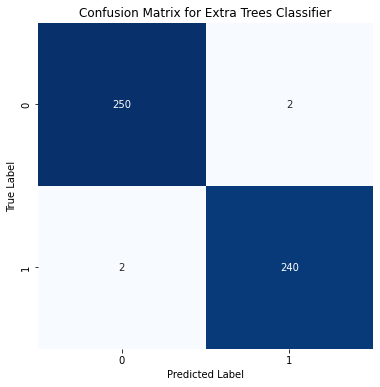

In [152]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])
    
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    
    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes', average='binary')
    recall = recall_score(y_test, y_pred, pos_label='Yes', average='binary')
    f1 = f1_score(y_test, y_pred, pos_label='Yes', average='binary')
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, precision, recall, f1, cm

# Initialize different classification models
models = {
    
    'Extra Trees Classifier': ExtraTreesClassifier()
   
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

plt.figure(figsize=(6, 6))
sns.heatmap(results[max_accuracy_index][-1], annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()